 # <b>1 <span style='color:#F76241'>|</span> Alright, lets build some nifty ML systems!</b>

<font size="9"><b>H</b></font>**old up, not so fast kiddo**. There are some more steps we have to take before getting into predictive modeling. 

Before throwing our data into a black box machine learning algorithm, we need to get to know our data a bit better. Specifically, we need to **understand certain statistics about the dataset** which will **help us when we start using ML**.

As mentioned previously, I will be using the `California housing dataset` to showcase these libraries. Here is an excerpt taken from the <a href="https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html" target="_blank">dataset's scikit-learn webpage</a>:

```
This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.

```

Tldr, each record in the dataset is a block of people ranging from 600 to 3,000. It's always important to do a background check on your data.


-----



<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px;">
    <p style="padding: 8px;color:white;text-align: center;">1.1<em> Inspecting the DataFrame</em></p>
</div>

First, we need to import the libraries we'll be using and load in the data.

In [19]:
import pandas as pd                                  # data storage and manipulation
import matplotlib.pyplot as plt                      # data visualization
import seaborn as sns                                # more data visualization. More options to customize matplotlib plots
from sklearn.preprocessing import StandardScaler     # data preprocessing
from sklearn.model_selection import train_test_split # train, test split creation

The data will be loaded in as a pandas <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html" target="_blank">DataFrame</a>.

`DataFrames` provides us attributes and functions to extract statistics from data. They are very similar to how spreadsheets work in that you have columns and rows. Each column represents some **feature** of your data and the rows are the data points.

<a href="https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/#" target="_blank">There are many ways to instantiate DataFrames.</a> I usually only use two: via python `dictionaries`, and reading a `CSV` file. 

Recall that dictionaries are **key:value** pairs and are in many ways similar to Dataframes actually. When making a DataFrame from a dictionary, each **key** is a column name and **values** are the rows. 

For example:

```python
>>> my_dict = {"Name" : ["Eric", "Steven", "Ryan"], "Age" : [43, 56, 61]}
>>> df = pd.DataFrame(my_dict)
>>> df
```
| Name   | Age |
|--------|-----|
| Eric   | 43  |
| Steven | 56  |
| Ryan   | 61  |

Often when working with data however, you'd want to store in a separate file, such as a **C**omma **S**eparated **V**alues (`CSV`) file and load it in as a DataFrame like so:

In [2]:
df = pd.read_csv("data/housing.csv")

After loading it, now we can use various methods for exploring the information

In [3]:
df.head() # gets the five first entries

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.tail() # gets the last five entries

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
df.shape # tells us how large our DataFrame is. In this case, 20640 rows, 10 columns

(20640, 10)

In [13]:
df.describe() # gives us handy statistics such as mean, std, quartiles, etc. for each column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info() # gives us more detailed information about our DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Looking at the return value of `df.info()`, we can see that there are _20640_ entries in total (a.k.a, rows). Most of the data types (Dtype) are floats as well.

Interestingly enough, if you look at **total_bedrooms**, there appears to only be _20433_ non-null entries. This means that 207 records in our DataFrame contain `null` values (20640 - 20433 = 207). These indicate the **absence of a value**. This can happen in many ways: data entry mistake, data not recorded, some computing error, etc. Dealing with missing values in data is very common. There are multiple ways to deal with this which we will get to soon.


Another way of checking for `null` values is the following:

In [12]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

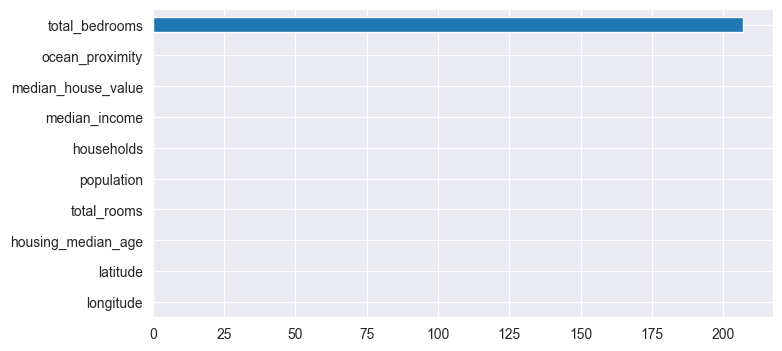

In [25]:
df.isna().sum().sort_values(ascending=True).plot(kind='barh',figsize=(8,4)) # makes a barplot of all missing values.
plt.show()

In order to get a high level overview of the distribution of our data, we should look at <a href="https://www.mathsisfun.com/data/histograms.html" target="_blank">histograms</a> for each numerical attribute. 

Thankfully, the pandas DataFrame class has plotting methods built in that use matplotlib. Additionally, the seaborn library can be used to further customize the matplotlib visuals.

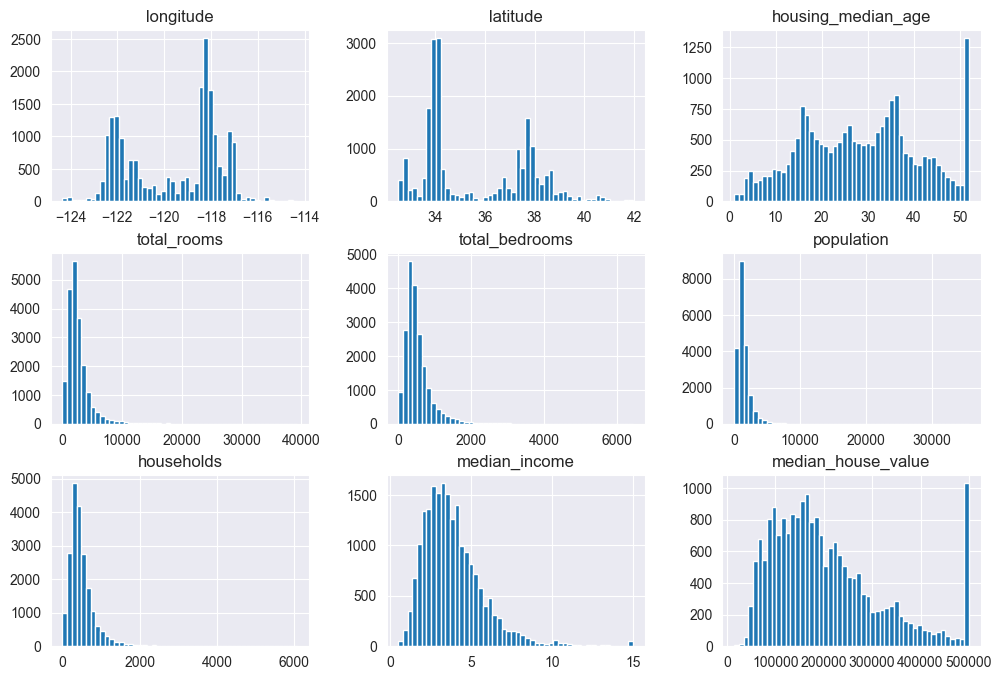

In [20]:
sns.set_style("darkgrid")
df.hist(bins=50, figsize=(12,8))
plt.show()

Eagle-eyed readers may have noticed that some of these plots exhibit odd properties:

1. The **housing_median_age** and **median_house_value** plots have maximum values capped at a point (50 and 500000, respectively).
2. The **median_income** plot x-axis values have been scaled down and also capped. So 5 = 5000, 10 = 10,000, etc up until 15 (15,000).

This is not ideal, as we want our machine learning model to see all possible values, but it's not a huge problem. Another thing to note is that most of these plots are **skewed right**. A.k.a, they extend further to the right of the median than to the left. Again, this is also not a huge issue. We will be applying transformations later on that will give it a more normal curve. 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px;">
    <p style="padding: 8px;color:white;text-align: center;">1.2<em> Before we continue...</em></p>
</div>

Before we continue making beautiful visualizations, if you recall from the `01_intro.ipynb` notebook, we need to make **train, dev, and test** splits. It's important to do this _before_ inspecting the dataset thoroughly since we need to keep the testing data absolutely separate from the training. 

To do this, we will use one of python's core machine learning libraries called <a href="https://scikit-learn.org/stable/" target="_blank">scikit-learn</a> to make these splits for us. We will be seeing a lot more of this library in future notebooks. 



In [8]:
from sklearn.model_selection import train_test_split

In [10]:
train, test  = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
